##### IMPORTING LIBRARIES

In [153]:
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

##### TASK 2

In [154]:
rollno = 2020101001
k = (rollno % 3) + 1
m = (rollno % 5) + 1
x0 = (rollno % 7) + 1
n = 10000  # No of sampling points. The more the merrier.

w = sqrt(k/m)
time = 15  # Time period = 2*pi. Therefore time > 2*pi.
dt = time/n

taxis = np.linspace(0, time, n)

r = np.zeros([n, 2])
r[0] = [x0, 0]

M = np.array([[0, 1],[-(k/m), 0]])
I = np.array([[1, 0],[0, 1]])

for i in range(n - 1):
    r[i+1] = np.dot((dt*M + I),(r[i]))

##### PART A:

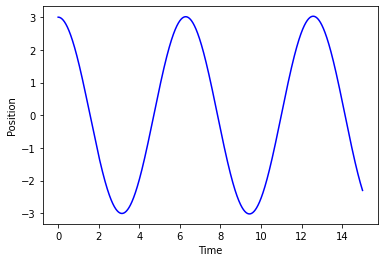

In [155]:
plt.plot(taxis, r[:, 0], 'b')
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()

##### PART B:

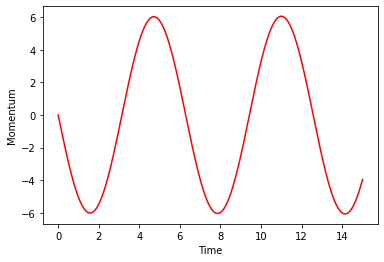

In [156]:
plt.plot(taxis, m * r[:,1], 'r')
plt.xlabel("Time")
plt.ylabel("Momentum")
plt.show()

##### TASK 3

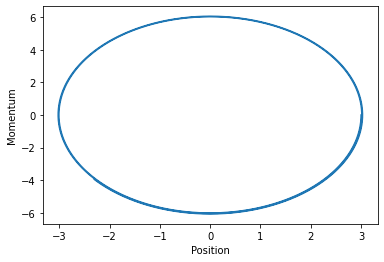

In [157]:
plt.plot(np.array_split(r, 2, axis=1)[0], m*np.array_split(r, 2, axis=1)[1])
plt.xlabel("Position")
plt.ylabel("Momentum")
plt.show()

##### TASK 4

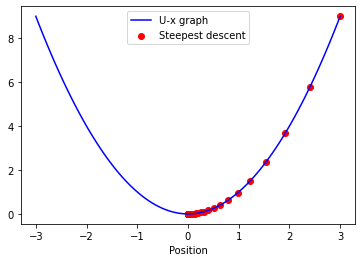

In [158]:
alpha = 0.1
no_of_iterations = 1000

# U = 1/2 * k * x**2
# dUdx = k * x

x = np.linspace(-x0, x0, 100)
U = np.zeros(100)

for i in range(100):
    U[i] = 1/2 * k * x[i]**2

plt.plot(x, U, 'b', label="U-x graph")

potential = np.zeros(no_of_iterations)
xaxis = np.zeros(no_of_iterations)

xaxis[0] = x0
potential[0] = 1/2 * k * x0**2

def diff(x):
    dUdx = k*x
    return dUdx

def new_x_and_U(x):
    dUdx = diff(x)
    x = x - alpha * dUdx
    U = 1/2 * k * x**2
    return x, U

for i in range(1, no_of_iterations):
    [xaxis[i], potential[i]] = new_x_and_U(xaxis[i-1])

plt.scatter(xaxis, potential, label="Steepest descent", color="red")
plt.xlabel("Potential energy")
plt.xlabel("Position")
plt.legend()
plt.show()